In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

In [6]:
print('No. of fraud cases:', round((df[df['Class'] == 1].shape[0]/df.shape[0])*100, 2), '%')
print('No. of non-fraud cases:', round((df[df['Class'] == 0].shape[0]/df.shape[0])*100, 2),'%')

No. of fraud cases: 0.17 %
No. of non-fraud cases: 99.83 %


D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

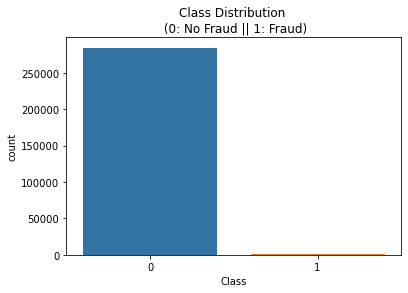

In [7]:
sns.countplot(df['Class'])
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)')

From the above observation, it seems that the data is very imbalanced. As most of the transactions are not fraud.

# Scaling the feature "Time" and "Amount"

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time'>

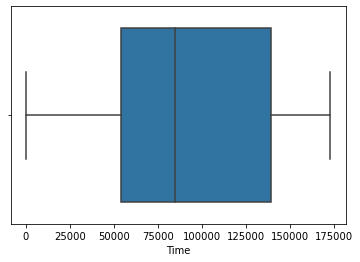

In [8]:
sns.boxplot(df['Time'])

D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


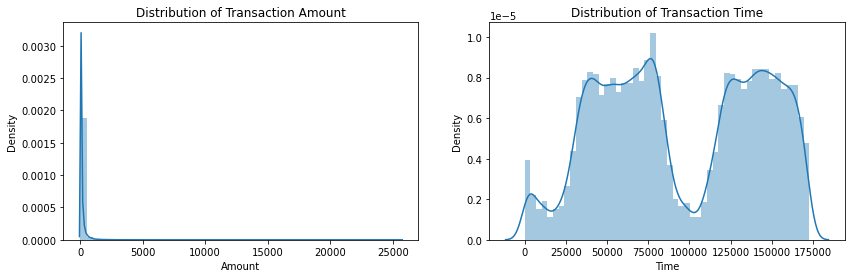

In [9]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df['Amount'])
plt.title('Distribution of Transaction Amount')

plt.subplot(122)
sns.distplot(df['Time'])
plt.title('Distribution of Transaction Time')

plt.show()

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

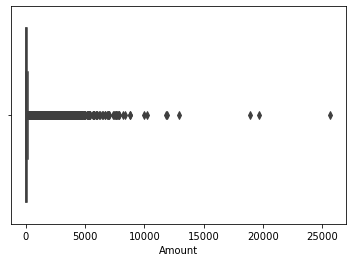

In [10]:
sns.boxplot(df['Amount'])

It can be observed from above box pot that most of the transaction amount is less than or equal to 10000 therefore, the remaining transaction amount would act as outlier for our dataset.

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

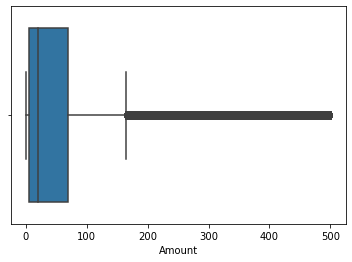

In [11]:
sns.boxplot(df[df['Amount']<=500]['Amount'])

In [12]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
rs1 = RobustScaler(copy = False)
rs2 = RobustScaler(copy = False)

In [14]:
rs1.fit_transform(df['Amount'].values.reshape(-1,1))

array([[ 1.78327395],
       [-0.26982463],
       [ 4.98372109],
       ...,
       [ 0.64109551],
       [-0.16767973],
       [ 2.72479564]])

In [15]:
rs2.fit_transform(df['Time'].values.reshape(-1,1))

array([[-0.99498349],
       [-0.99498349],
       [-0.99497175],
       ...,
       [ 1.03497457],
       [ 1.03497457],
       [ 1.03502156]])

In [16]:
rs1.scale_

array([71.565])

In [17]:
df.rename(columns={'Time':'scaled_time', 'Amount':'scaled_amount'}, inplace = True)

In [18]:
df.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


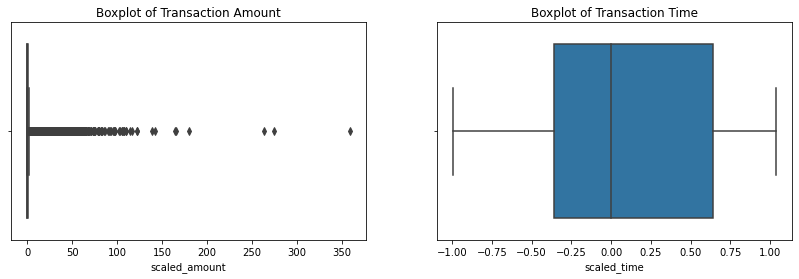

In [19]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.boxplot(df['scaled_amount'])
plt.title('Boxplot of Transaction Amount')

plt.subplot(122)
sns.boxplot(df['scaled_time'])
plt.title('Boxplot of Transaction Time')

plt.show()

In [20]:
df.sample(frac=1)

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
168874,0.408017,-0.453495,0.500477,-0.559159,-0.334116,0.273782,-1.190017,0.711302,0.183231,-0.128464,...,-0.087075,-0.364383,0.304481,-0.097320,-0.613002,0.167944,0.129622,-0.009513,0.685810,0
59552,-0.420599,-1.355650,0.105903,2.158963,-3.258793,-0.368394,-0.409272,0.634258,-0.111720,1.505077,...,0.074739,0.684690,-0.326122,0.074770,0.727127,-0.168285,-0.070777,-0.179381,0.427583,0
14370,-0.695591,1.311151,0.245236,-0.315403,0.317876,0.469366,0.191061,-0.042013,0.042288,0.172323,...,-0.355547,-0.999260,-0.010631,-1.377054,0.319445,0.211983,-0.010517,0.012569,-0.279746,0
84250,-0.287456,1.243691,0.340652,0.171893,0.795681,0.181639,-0.072994,0.072705,-0.056302,-0.326522,...,-0.041348,-0.071883,-0.151106,-0.483358,0.660910,-0.408811,0.024781,0.010005,-0.210298,0
153962,0.189605,1.894232,-0.682671,0.065514,0.394419,-0.915619,0.140943,-1.167551,0.219491,2.664834,...,-0.084958,-0.008234,0.269077,-0.540300,-0.676485,0.455182,-0.055633,-0.057028,0.237546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257447,0.863239,2.072833,0.210715,-1.674650,0.418489,0.463352,-0.882721,0.235300,-0.279539,0.382971,...,-0.354090,-0.879942,0.335019,0.587760,-0.238230,0.167204,-0.057999,-0.028541,-0.279746,0
692,-0.988839,-0.421665,0.348353,1.750223,0.546512,0.461304,1.439793,0.452613,0.319216,-0.046137,...,-0.015406,0.378305,0.138206,-0.598534,-0.776517,0.526562,0.007711,-0.094513,0.288409,0
147279,0.042623,1.755387,-0.976810,-1.936195,0.664976,-0.054637,-0.493628,0.331787,-0.277843,-1.014495,...,-0.177806,-0.310612,-0.142656,-0.510650,0.280286,-0.498900,-0.033031,-0.039504,2.486411,0
142724,0.002455,1.107639,0.069196,0.821514,1.481854,-0.591441,-0.258963,-0.173818,0.098690,0.553184,...,-0.227851,-0.514833,0.118544,0.350317,0.337361,-0.516880,0.047744,0.027315,-0.097813,0


In [21]:
df[df['Class']==1].shape

(492, 31)

# Equal Distributing and Correlating

In [22]:
df1 = pd.concat([df[df['Class']==0].sample(frac=1).iloc[:492], df[df['Class']==1]]).sample(frac=1, random_state=42) 

In [23]:
df1.shape

(984, 31)

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No. of fraud cases: 50.0 %
No. of non-fraud cases: 50.0 %


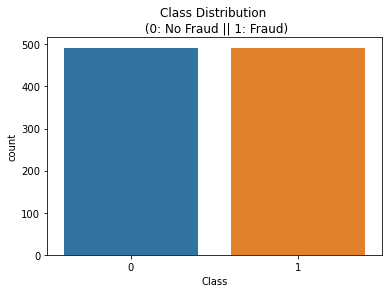

In [24]:
sns.countplot(df1['Class'])
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)')

print('No. of fraud cases:', round((df1[df1['Class'] == 1].shape[0]/df1.shape[0])*100, 2), '%')
print('No. of non-fraud cases:', round((df1[df1['Class'] == 0].shape[0]/df1.shape[0])*100, 2),'%')

Text(0.5, 1.0, 'Imbalanced Correlation Matrix for balanced dataset')

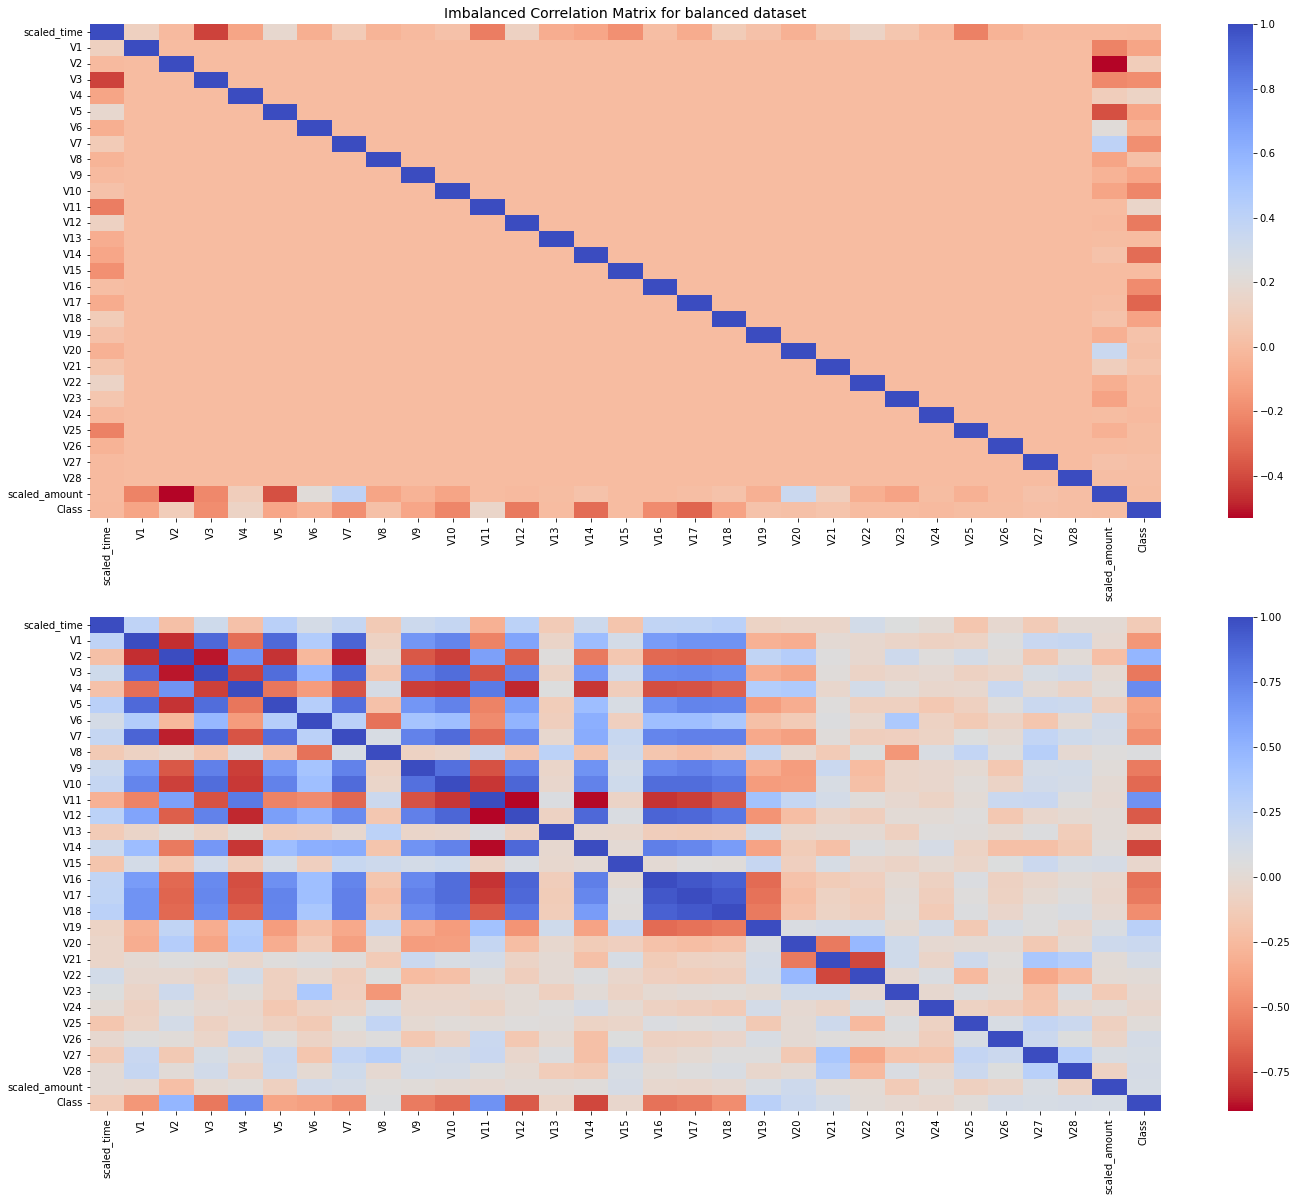

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix for original dataset", fontsize=14)

corr1 = df1.corr()
sns.heatmap(corr1, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax1.set_title("Imbalanced Correlation Matrix for balanced dataset", fontsize=14)


<ul>
    <li>V10, V12, V14, V16 - are negatively correlated</li>
    <li>V2, V4, V11, V19 - are positively correlated</li>
</ul>

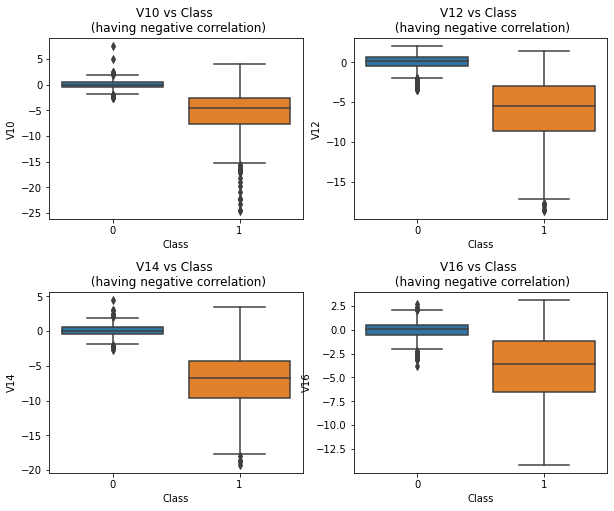

The lower is the value of these features, more likely is the fraud transaction


In [26]:
f, axes = plt.subplots(2,2,  figsize=(10,8))

plt.subplots_adjust(hspace = 0.4)

sns.boxplot(x="Class", y = "V10", data = df1, ax = axes[0][0])
axes[0][0].set_title("V10 vs Class \n (having negative correlation)")

sns.boxplot(x="Class", y = "V12", data = df1, ax = axes[0][1])
axes[0][1].set_title("V12 vs Class \n (having negative correlation)")

sns.boxplot(x="Class", y = "V14", data = df1, ax = axes[1][0])
axes[1][0].set_title("V14 vs Class \n (having negative correlation)")

sns.boxplot(x="Class", y = "V16", data = df1, ax = axes[1][1])
axes[1][1].set_title("V16 vs Class \n (having negative correlation)")

plt.show()

print("The lower is the value of these features, more likely is the fraud transaction")

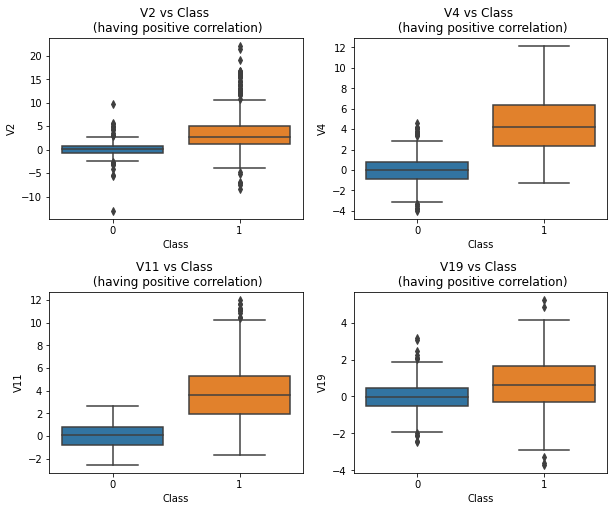

The higher is the value of these features, more likely is the non fraud transaction


In [27]:
f, axes = plt.subplots(2,2,  figsize=(10,8))

plt.subplots_adjust(hspace = 0.4)

sns.boxplot(x="Class", y = "V2", data = df1, ax = axes[0][0])
axes[0][0].set_title("V2 vs Class \n (having positive correlation)")

sns.boxplot(x="Class", y = "V4", data = df1, ax = axes[0][1])
axes[0][1].set_title("V4 vs Class \n (having positive correlation)")

sns.boxplot(x="Class", y = "V11", data = df1, ax = axes[1][0])
axes[1][0].set_title("V11 vs Class \n (having positive correlation)")

sns.boxplot(x="Class", y = "V19", data = df1, ax = axes[1][1])
axes[1][1].set_title("V19 vs Class \n (having positive correlation)")

plt.show()

print("The higher is the value of these features, more likely is the non fraud transaction")

D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

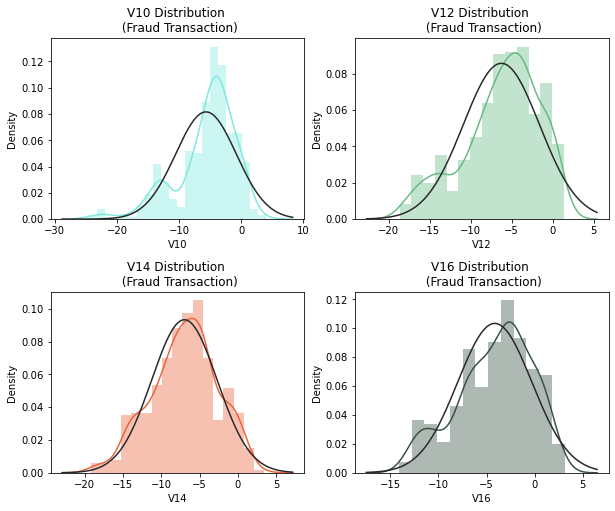

V14 is the only feature among V10, V12, V16 that has almost normal distribution


In [28]:
from scipy.stats import norm

f,([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,  figsize=(10,8))

plt.subplots_adjust(hspace=0.4)

sns.distplot(df1[df1['Class']==1]['V10'], fit=norm, ax = ax1, color='#7FE9DE')
ax1.set_title('V10 Distribution \n (Fraud Transaction)')

sns.distplot(df1[df1['Class']==1]['V12'], fit=norm, ax = ax2, color='#68B984')
ax2.set_title('V12 Distribution \n (Fraud Transaction)')

sns.distplot(df1[df1['Class']==1]['V14'], fit=norm, ax = ax3, color='#EB6440')
ax3.set_title('V14 Distribution \n (Fraud Transaction)')

sns.distplot(df1[df1['Class']==1]['V16'], fit=norm, ax = ax4, color='#395144')
ax4.set_title('V16 Distribution \n (Fraud Transaction)')

plt.show()
print('V14 is the only feature among V10, V12, V16 that has almost normal distribution')

In [29]:
def remove_outliers(fraud_data):
    q25,q75 = np.percentile(fraud_data, 25), np.percentile(fraud_data, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75-q25
    print('iqr: {}'.format(iqr))
    cut_off = 1.5*iqr
    print('Cut off: {}'.format(cut_off))
    lower_lim, upper_lim = q25-cut_off, q75+cut_off
    print('Lower: {}'.format(lower_lim))
    print('Upper: {}'.format(upper_lim))
    
    outliers = [x for x in fraud_data if x<lower_lim or x>upper_lim]
    return outliers

In [30]:
print('Removing outliers in feature V10\n')
outliers_10=remove_outliers(df1[df1['Class']==1]['V10'].values)
print('No. of outliers in feature V10: {}'.format(len(outliers_10)))
print('V10 outliers are: {}'.format(outliers_10))

df1 = df1[df1['V10'].apply(lambda x:False if x in outliers_10 else True)]

Removing outliers in feature V10

Quartile 25: -7.7566982278474725 | Quartile 75: -2.6141839131895623
iqr: 5.142514314657911
Cut off: 7.713771471986866
Lower: -15.47046969983434
Upper: 5.099587558797303
No. of outliers in feature V10: 19
V10 outliers are: [-16.6496281595399, -20.9491915543611, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -18.2711681738888, -16.6011969664137, -15.5637913387301, -23.2282548357516, -18.9132433348732, -16.2556117491401, -19.836148851696, -24.4031849699728, -15.5637913387301, -24.5882624372475, -17.1415136412892, -16.3035376590131, -16.7460441053944]


In [31]:
df1.shape

(965, 31)

In [32]:
print('Removing outliers in feature V12\n')
outliers_12=remove_outliers(df1[df1['Class']==1]['V12'].values)
print('No. of outliers in feature V12: {}'.format(len(outliers_12)))
print('V12 outliers are: {}'.format(outliers_12))

df1 = df1[df1['V12'].apply(lambda x:False if x in outliers_12 else True)]

Removing outliers in feature V12

Quartile 25: -8.46396612952571 | Quartile 75: -2.82494562476694
iqr: 5.63902050475877
Cut off: 8.458530757138156
Lower: -16.922496886663865
Upper: 5.633585132371216
No. of outliers in feature V12: 13
V12 outliers are: [-17.1829184301947, -17.003289445516, -17.1313009454468, -18.0475965708216, -17.2286622386187, -18.5536970096458, -18.4311310279993, -17.1829184301947, -18.6837146333443, -17.7691434633638, -17.1504052507291, -17.6316063138707, -17.003289445516]


In [33]:
df1.shape

(952, 31)

In [34]:
print('Removing outliers in feature V14\n')
outliers_14=remove_outliers(df1[df1['Class']==1]['V14'].values)
print('No. of outliers in feature V14: {}'.format(len(outliers_14)))
print('V14 outliers are: {}'.format(outliers_14))

df1 = df1[df1['V14'].apply(lambda x:False if x in outliers_14 else True)]

Removing outliers in feature V14

Quartile 25: -9.414161044857002 | Quartile 75: -4.288939281087107
iqr: 5.125221763769894
Cut off: 7.687832645654842
Lower: -17.101993690511843
Upper: 3.3988933645677344
No. of outliers in feature V14: 5
V14 outliers are: [3.44242199594215, -17.4759212828566, -17.230202160711, -17.7216383537133, -17.6206343516773]


In [35]:
df1.shape

(947, 31)

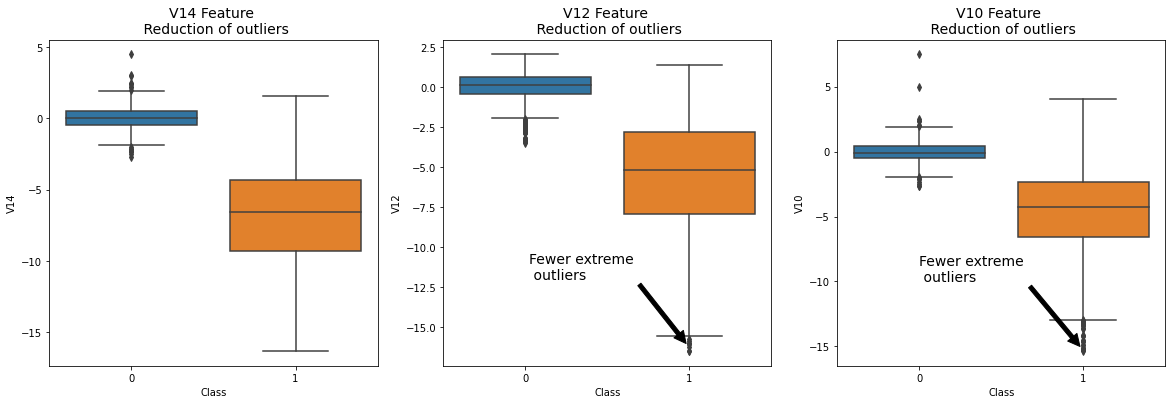

In [36]:
f, ([ax1, ax2, ax3]) = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(x = 'Class', y = 'V14', data=df1, ax=ax1)
ax1.set_title('V14 Feature \n Reduction of outliers', fontsize=14)

sns.boxplot(x = 'Class', y = 'V12', data=df1, ax=ax2)
ax2.set_title('V12 Feature \n Reduction of outliers', fontsize=14)
ax2.annotate("Fewer extreme \n outliers", xy=(0.98, -16.0), xytext=(0.02, -12.0), arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x = 'Class', y = 'V10', data=df1, ax=ax3)
ax3.set_title('V10 Feature \n Reduction of outliers', fontsize=14)
ax3.annotate("Fewer extreme \n outliers", xy=(0.98, -15.0), xytext=(0.0, -10.0), arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

In [56]:
X = df1.drop('Class', axis=1)
y = df1['Class']

# t-SNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print('T-SNE took {:.2} s'.format(t1-t0))

# PCA implementation
t0=time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)
t1=time.time()
print('PCA took {:.2} s'.format(t1-t0))

# TruncatedSVD
t0=time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm = 'randomized' ,random_state=42).fit_transform(X)
t1=time.time()
print('Truncated SVD took {:.2} s'.format(t1-t0))

D:\Anaconda3distribution\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3distribution\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


T-SNE took 4.9 s
PCA took 0.009 s
Truncated SVD took 0.008 s


In [59]:
X.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
42756,-0.510568,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.307413
69772,-0.365559,1.398579,-1.016501,0.206137,-1.243529,-1.316324,-0.803770,-0.646467,-0.258191,-2.271497,...,-0.193330,-0.107143,0.143880,-0.121268,0.579164,0.646191,-0.101879,0.013166,0.010434,0.433173
111690,-0.145267,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,3.030811
229711,0.720521,-0.569251,0.465116,1.275459,-1.481379,0.268840,0.048757,0.338479,0.236172,0.614703,...,-0.321939,0.356404,1.017139,-0.185547,0.762702,-0.400835,-0.558451,0.046977,0.191052,-0.185845
28229,-0.584852,1.021114,-0.789266,1.468781,1.269701,-1.632309,0.204518,-1.007939,0.367811,2.039899,...,-0.180863,-0.206982,-0.363625,-0.036512,0.386998,0.279826,0.390112,0.017359,0.030076,0.613428


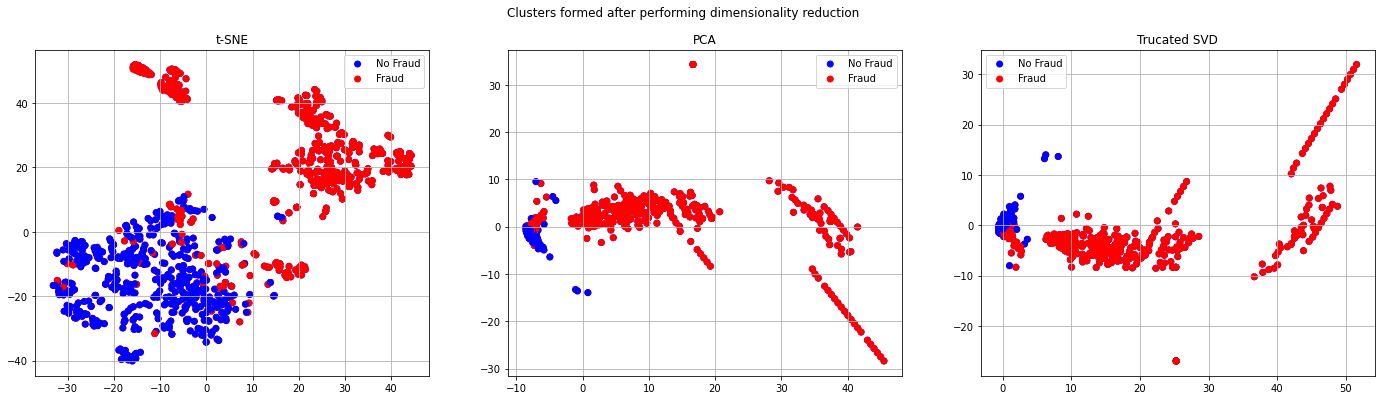

In [89]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

f.suptitle('Clusters formed after performing dimensionality reduction')

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:, 1], c=(y==0), label = 'No Fraud', cmap='bwr')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:, 1], c=(y==1), label = 'Fraud', cmap='bwr')
ax1.legend()
ax1.set_title('t-SNE')
ax1.grid(True)

ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), label = 'No Fraud', cmap='bwr')
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==1), label = 'Fraud', cmap='bwr')
ax2.legend()
ax2.set_title('PCA')
ax2.grid(True)


ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:, 1], c=(y==0), label = 'No Fraud', cmap='bwr')
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:, 1], c=(y==1), label = 'Fraud', cmap='bwr')
ax3.legend()
ax3.set_title('Trucated SVD')
ax3.grid(True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "KNearest": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5)
}

In [147]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = round(np.mean(cross_val_score(classifier, X_train, y_train, cv=5)),2)
    print('classifier:', classifier.__class__.__name__, 'has a accauracy score of ', 
          training_score*100,'% on the training dataset.')

classifier: LogisticRegression has a accauracy score of  95.0 % on the training dataset.
classifier: SVC has a accauracy score of  95.0 % on the training dataset.
classifier: KNeighborsClassifier has a accauracy score of  94.0 % on the training dataset.
classifier: DecisionTreeClassifier has a accauracy score of  94.0 % on the training dataset.


In [155]:
# Logistic Regression
logReg_params = {"penalty":['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logReg = GridSearchCV(LogisticRegression(), logReg_params, cv=5)
grid_logReg.fit(X_train, y_train)
print("Best parameters in logistic Regression is: ", grid_logReg.best_params_)
logReg = grid_logReg.best_estimator_
print("Best score of logistic Regression is : ", round(grid_logReg.best_score_, 2)*100,"%")

# K Nearest Neighbor
K_params = {"n_neighbors":[2,3,4], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), K_params, cv=5)
grid_knears.fit(X_train, y_train)
print("Best parameters in K nearest neighbor is: ", grid_knears.best_params_)
knn = grid_knears.best_estimator_
print("Best score of K nearest neighbor is : ", round(grid_knears.best_score_, 2)*100, "%")

# Support Vector Classifier
svc_params = {'C':[0.1, 0.5, 0.8, 1, 4], 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters in support vector classifier is: ", grid_svc.best_params_)
svc = grid_svc.best_estimator_
print("Best score of support vector classifier is : ", round(grid_svc.best_score_, 2)*100, "%")

# Decision Tree Classifier
dc_params = {'criterion':['gini', 'entropy'], 'max_depth':[None, 1, 2, 3, 5], 'min_samples_split':[0.25, 0.5, 0.6, 0.75]}
grid_dc = GridSearchCV(DecisionTreeClassifier(), dc_params, cv=5)
grid_dc.fit(X_train, y_train)
print("Best parameters in decision tree classifier is: ", grid_dc.best_params_)
dc = grid_dc.best_estimator_
print("Best score of decision tree classifier is : ", round(grid_dc.best_score_, 2)*100, "%")


D:\Anaconda3distribution\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3distribution\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters in logistic Regression is:  {'C': 1, 'penalty': 'l2'}
Best score of logistic Regression is :  95.0 %
Best parameters in K nearest neighbor is:  {'algorithm': 'auto', 'n_neighbors': 2}
Best score of K nearest neighbor is :  95.0 %
Best parameters in support vector classifier is:  {'C': 0.5, 'kernel': 'linear'}
Best score of support vector classifier is :  95.0 %
Best parameters in decision tree classifier is:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.5}
Best score of decision tree classifier is :  94.0 %


In [168]:
estimators = [('lr', logReg), ('svc', svc), ('dc', dc), ('knn', knn)]
vc = VotingClassifier(estimators=estimators)
print('Accuracy score', round(np.mean(cross_val_score(vc, X_train, y_train, cv=10, scoring='accuracy')), 2)*100,'%')

Accuracy score 95.0 %


In [175]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=2, min_samples_split=0.5)
rfc.fit(X_train, y_train)
rfc.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(max_depth=2, min_samples_split=0.5, n_estimators=1000)>

In [182]:
y_pred_logReg = 

0.6302655677655677